In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
from sklearn.tree import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

df = pd.read_csv('Datasets/training_data.csv',encoding = "ISO-8859-1")
dftest = pd.read_csv('Datasets/test_data.csv',encoding = "ISO-8859-1")

In [2]:
df.head()

,city_name,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN
0,Porto,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,NaN,0.0,NaN
1,Porto,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,céu claro,0.0,NaN
2,Porto,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,NaN,0.0,NaN
3,Porto,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,céu claro,0.0,NaN
4,Porto,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,NaN,0.0,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city_name                6812 non-null   object 
 1   record_date              6812 non-null   object 
 2   AVERAGE_SPEED_DIFF       6812 non-null   object 
 3   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64
 4   AVERAGE_TIME_DIFF        6812 non-null   float64
 5   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64
 6   LUMINOSITY               6812 non-null   object 
 7   AVERAGE_TEMPERATURE      6812 non-null   float64
 8   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64
 9   AVERAGE_HUMIDITY         6812 non-null   float64
 10  AVERAGE_WIND_SPEED       6812 non-null   float64
 11  AVERAGE_CLOUDINESS       4130 non-null   object 
 12  AVERAGE_PRECIPITATION    6812 non-null   float64
 13  AVERAGE_RAIN             563 non-null    object 
dtypes: float64(8), object(6)

Podemos ver que há 14 colunas, 8 com floats e 6 com objects.
Também podemos ver que ha missing values em AVERAGE_CLOUDINESS e AVERAGE_RAIN

In [4]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city_name                1500 non-null   object 
 1   record_date              1500 non-null   object 
 2   AVERAGE_FREE_FLOW_SPEED  1500 non-null   float64
 3   AVERAGE_TIME_DIFF        1500 non-null   float64
 4   AVERAGE_FREE_FLOW_TIME   1500 non-null   float64
 5   LUMINOSITY               1500 non-null   object 
 6   AVERAGE_TEMPERATURE      1500 non-null   float64
 7   AVERAGE_ATMOSP_PRESSURE  1500 non-null   float64
 8   AVERAGE_HUMIDITY         1500 non-null   float64
 9   AVERAGE_WIND_SPEED       1500 non-null   float64
 10  AVERAGE_CLOUDINESS       901 non-null    object 
 11  AVERAGE_PRECIPITATION    1500 non-null   float64
 12  AVERAGE_RAIN             140 non-null    object 
dtypes: float64(8), object(5)
memory usage: 152.5+ KB


In [5]:
print(df.isna().sum())

city_name                     0
record_date                   0
AVERAGE_SPEED_DIFF            0
AVERAGE_FREE_FLOW_SPEED       0
AVERAGE_TIME_DIFF             0
AVERAGE_FREE_FLOW_TIME        0
LUMINOSITY                    0
AVERAGE_TEMPERATURE           0
AVERAGE_ATMOSP_PRESSURE       0
AVERAGE_HUMIDITY              0
AVERAGE_WIND_SPEED            0
AVERAGE_CLOUDINESS         2682
AVERAGE_PRECIPITATION         0
AVERAGE_RAIN               6249
dtype: int64


In [6]:
print(df.AVERAGE_SPEED_DIFF.unique())
print(df.LUMINOSITY.unique())
print(df.AVERAGE_CLOUDINESS.unique())
print(df.city_name.unique())
print(df.AVERAGE_RAIN.unique())
print(df.AVERAGE_PRECIPITATION.unique())
print(df.record_date.unique())

['Medium' 'High' 'None' 'Low' 'Very_High']
['LIGHT' 'LOW_LIGHT' 'DARK']
[nan 'céu claro' 'nuvens dispersas' 'céu pouco nublado' 'céu limpo'
 'algumas nuvens' 'nuvens quebrados' 'tempo nublado' 'nuvens quebradas'
 'nublado']
['Porto']
[nan 'chuva fraca' 'chuva' 'chuva leve' 'chuvisco fraco' 'chuva moderada'
 'trovoada com chuva leve' 'aguaceiros' 'aguaceiros fracos'
 'chuva de intensidade pesada' 'trovoada com chuva'
 'chuva de intensidade pesado' 'chuva forte' 'chuvisco e chuva fraca']
[0.]
['2019-08-29 07:00:00' '2018-08-10 14:00:00' '2019-09-01 16:00:00' ...
 '2018-10-02 04:00:00' '2019-01-30 01:00:00' '2019-06-15 21:00:00']


Melhor analisando o data set vemos que AVERAGE_PRECIPITATION e city_name tem sempre o msm valor

In [7]:
df=df.drop(['city_name','AVERAGE_PRECIPITATION','AVERAGE_RAIN'],axis=1)
dftest=dftest.drop(['city_name','AVERAGE_PRECIPITATION','AVERAGE_RAIN'],axis=1)

In [8]:
df['LUMINOSITY'].replace({"DARK": 0, "LOW_LIGHT": 1, "LIGHT": 2}, inplace=True)
dftest['LUMINOSITY'].replace({"DARK": 0, "LOW_LIGHT": 1, "LIGHT": 2}, inplace=True)
df['AVERAGE_CLOUDINESS'].replace({"céu limpo": 0, "céu claro": 1, "nuvens dispersas": 2,"nuvens quebrados": 3,"nuvens quebradas": 3,"algumas nuvens": 4,"céu pouco nublado":5,'tempo nublado': 6,'nublado': 6}, inplace=True)
dftest['AVERAGE_CLOUDINESS'].replace({"céu limpo": 0, "céu claro": 1, "nuvens dispersas": 2,"nuvens quebrados": 3,"nuvens quebradas": 3,"algumas nuvens": 4,"céu pouco nublado":5,'tempo nublado': 6,'nublado': 6}, inplace=True)

In [9]:
df.head()

,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS
0,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,2,15.0,1019.0,100.0,3.0,NaN
1,2018-08-10 14:00:00,High,41.7,48.3,87.4,2,21.0,1021.0,53.0,5.0,1.0
2,2019-09-01 16:00:00,High,38.6,38.4,85.2,2,26.0,1014.0,61.0,4.0,NaN
3,2019-02-26 11:00:00,High,37.4,61.0,94.1,2,18.0,1025.0,48.0,4.0,1.0
4,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,2,15.0,1008.0,82.0,10.0,NaN


In [10]:
df['record_date'] = pd.to_datetime(df['record_date'])
dftest['record_date'] = pd.to_datetime(dftest['record_date'])

In [11]:
df['record_date'] = df.record_date.dt.hour.astype(int)
dftest['record_date'] = dftest.record_date.dt.hour.astype(int)
#df['day of week'] = df.record_date.dt.day_name()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   record_date              6812 non-null   int64  
 1   AVERAGE_SPEED_DIFF       6812 non-null   object 
 2   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64
 3   AVERAGE_TIME_DIFF        6812 non-null   float64
 4   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64
 5   LUMINOSITY               6812 non-null   int64  
 6   AVERAGE_TEMPERATURE      6812 non-null   float64
 7   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64
 8   AVERAGE_HUMIDITY         6812 non-null   float64
 9   AVERAGE_WIND_SPEED       6812 non-null   float64
 10  AVERAGE_CLOUDINESS       4130 non-null   float64
dtypes: float64(8), int64(2), object(1)
memory usage: 585.5+ KB


In [12]:
df.head()

,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS
0,7,Medium,41.5,11.5,71.4,2,15.0,1019.0,100.0,3.0,NaN
1,14,High,41.7,48.3,87.4,2,21.0,1021.0,53.0,5.0,1.0
2,16,High,38.6,38.4,85.2,2,26.0,1014.0,61.0,4.0,NaN
3,11,High,37.4,61.0,94.1,2,18.0,1025.0,48.0,4.0,1.0
4,12,Medium,41.6,50.4,77.0,2,15.0,1008.0,82.0,10.0,NaN


Para fazer fill dos NaN da coluna average_rain podemos:
 - Criar uma nova categoria só para os que estavam null (DataFrame[ColName] = np.where(DataFrame[ColName].isnull(),"Unknown",DataFrame[ColName]))
 - Preencher com a moda dessa coluna (Data['Married'].fillna(Data['Married'].mode(), inplace=True))

In [13]:
#df['AVERAGE_RAIN'] = np.where(df['AVERAGE_RAIN'].isnull(),"Unknown",df['AVERAGE_RAIN'])
#print(df['AVERAGE_RAIN'].isna().sum())

In [14]:
df.head()

,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS
0,7,Medium,41.5,11.5,71.4,2,15.0,1019.0,100.0,3.0,NaN
1,14,High,41.7,48.3,87.4,2,21.0,1021.0,53.0,5.0,1.0
2,16,High,38.6,38.4,85.2,2,26.0,1014.0,61.0,4.0,NaN
3,11,High,37.4,61.0,94.1,2,18.0,1025.0,48.0,4.0,1.0
4,12,Medium,41.6,50.4,77.0,2,15.0,1008.0,82.0,10.0,NaN


In [15]:
print(df.isna().sum())

record_date                   0
AVERAGE_SPEED_DIFF            0
AVERAGE_FREE_FLOW_SPEED       0
AVERAGE_TIME_DIFF             0
AVERAGE_FREE_FLOW_TIME        0
LUMINOSITY                    0
AVERAGE_TEMPERATURE           0
AVERAGE_ATMOSP_PRESSURE       0
AVERAGE_HUMIDITY              0
AVERAGE_WIND_SPEED            0
AVERAGE_CLOUDINESS         2682
dtype: int64


In [16]:
#Fill null AVERAGE_CLOUDINESS
#df['AVERAGE_CLOUDINESS'] = np.where(df['AVERAGE_CLOUDINESS'].isnull(),"Unknown",df['AVERAGE_CLOUDINESS'])
df['AVERAGE_CLOUDINESS']=df['AVERAGE_CLOUDINESS'].fillna(method='bfill')
df['AVERAGE_CLOUDINESS']=df['AVERAGE_CLOUDINESS'].fillna(method='ffill')
print(df['AVERAGE_CLOUDINESS'].isna().sum())

dftest['AVERAGE_CLOUDINESS']=dftest['AVERAGE_CLOUDINESS'].fillna(method='bfill')
dftest['AVERAGE_CLOUDINESS']=dftest['AVERAGE_CLOUDINESS'].fillna(method='ffill')


0


In [17]:
df['AVERAGE_SPEED_DIFF'].replace({"None": 0, "Low": 1, "Medium": 2, "High": 3, "Very_High": 4}, inplace=True)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   record_date              6812 non-null   int64  
 1   AVERAGE_SPEED_DIFF       6812 non-null   int64  
 2   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64
 3   AVERAGE_TIME_DIFF        6812 non-null   float64
 4   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64
 5   LUMINOSITY               6812 non-null   int64  
 6   AVERAGE_TEMPERATURE      6812 non-null   float64
 7   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64
 8   AVERAGE_HUMIDITY         6812 non-null   float64
 9   AVERAGE_WIND_SPEED       6812 non-null   float64
 10  AVERAGE_CLOUDINESS       6812 non-null   float64
dtypes: float64(8), int64(3)
memory usage: 585.5 KB


AxesSubplot(0.125,0.125;0.775x0.755)


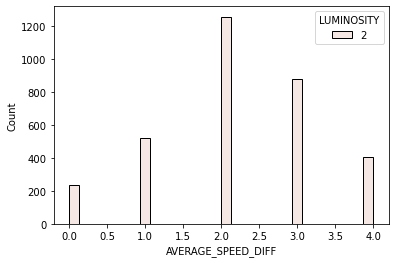

In [18]:


#Drop luminosity pode não ser importante
print(sns.histplot(data=df[df['LUMINOSITY']==2], hue = 'LUMINOSITY', x = 'AVERAGE_SPEED_DIFF'))

In [19]:
df.describe()

,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS
count,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000
mean,11.534498,1.442454,40.661010,25.637111,81.143952,1.005872,16.193482,1017.388139,80.084190,3.058573,2.449060
std,6.939520,1.275478,4.119023,33.510507,8.294401,0.980336,5.163492,5.751061,18.238863,2.138421,1.595367
min,0.000000,0.000000,30.500000,0.000000,46.400000,0.000000,0.000000,985.000000,14.000000,0.000000,0.000000
25%,6.000000,0.000000,37.600000,2.275000,75.400000,0.000000,13.000000,1015.000000,69.750000,1.000000,1.000000
50%,12.000000,1.000000,40.700000,12.200000,82.400000,1.000000,16.000000,1017.000000,83.000000,3.000000,2.000000
75%,18.000000,2.000000,43.500000,36.200000,87.400000,2.000000,19.000000,1021.000000,93.000000,4.000000,4.000000
max,23.000000,4.000000,55.900000,296.500000,112.000000,2.000000,35.000000,1033.000000,100.000000,14.000000,6.000000


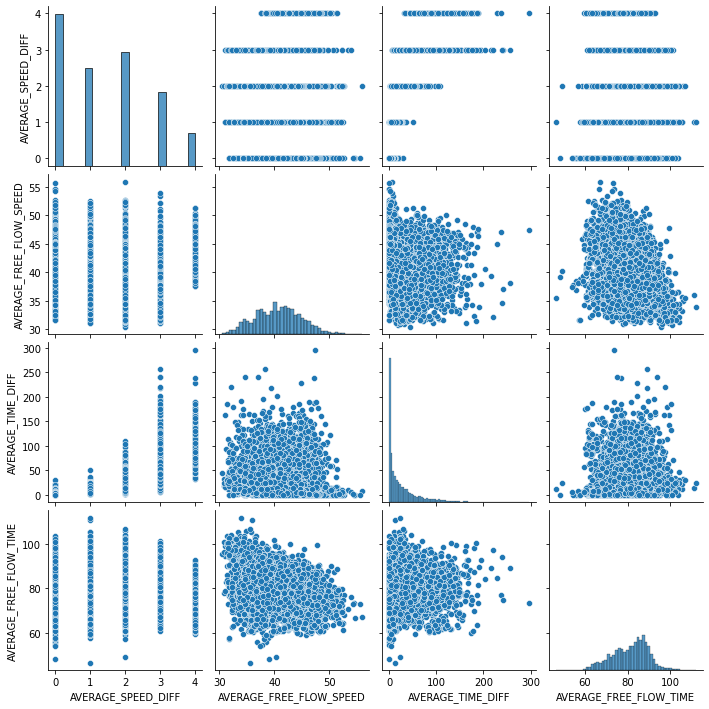

In [20]:
cols = ['AVERAGE_SPEED_DIFF','AVERAGE_FREE_FLOW_SPEED', 'AVERAGE_TIME_DIFF', 'AVERAGE_FREE_FLOW_TIME']

sns.pairplot(df[cols], height=2.5)

<AxesSubplot:>

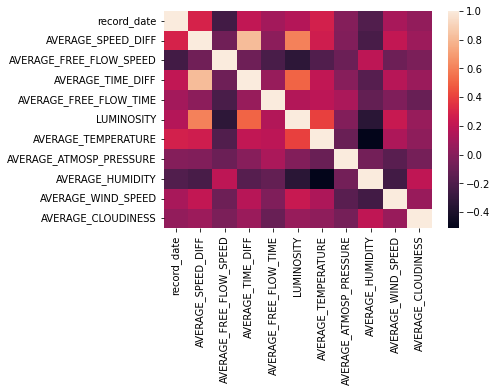

In [21]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='AVERAGE_TIME_DIFF'>

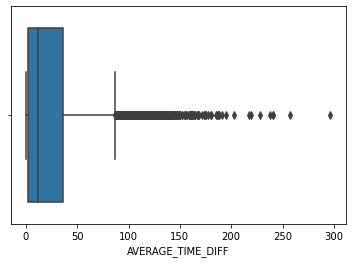

In [22]:
sns.boxplot(x=df['AVERAGE_TIME_DIFF'])

In [23]:
from scipy.stats.mstats import winsorize

#time_dif = df['AVERAGE_TIME_DIFF']
#time_dif.quantile(0.01)
#time_dif.quantile(0.99)
#df['AVERAGE_TIME_DIFF'] = winsorize(time_dif, (0.01,0.01))
#sns.boxplot(x=df['AVERAGE_TIME_DIFF'])


In [24]:
x = df.drop(['AVERAGE_SPEED_DIFF'], axis=1)
y = df['AVERAGE_SPEED_DIFF'].to_frame()

In [25]:
print(x.isna().sum())

record_date                0
AVERAGE_FREE_FLOW_SPEED    0
AVERAGE_TIME_DIFF          0
AVERAGE_FREE_FLOW_TIME     0
LUMINOSITY                 0
AVERAGE_TEMPERATURE        0
AVERAGE_ATMOSP_PRESSURE    0
AVERAGE_HUMIDITY           0
AVERAGE_WIND_SPEED         0
AVERAGE_CLOUDINESS         0
dtype: int64


In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=2021)

/home/carolina/anaconda3/envs/env_DAA/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

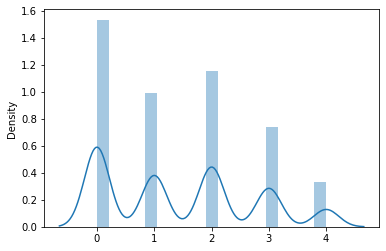

In [27]:
sns.distplot(y)

/home/carolina/anaconda3/envs/env_DAA/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

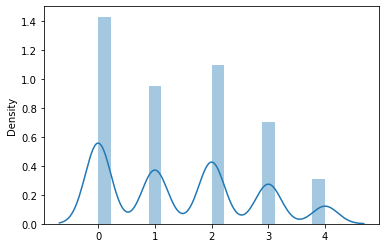

In [28]:
sns.distplot(y_train)

/home/carolina/anaconda3/envs/env_DAA/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

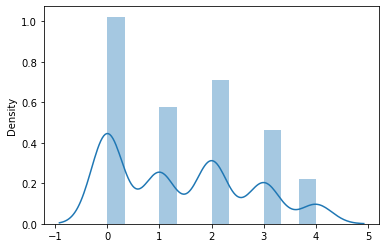

In [29]:
sns.distplot(y_test)

In [30]:
clf = DecisionTreeClassifier(random_state = 2021)
scores=cross_val_score(clf,x_train,y_train,cv=10)
print("RESULT: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(),scores.std()))

RESULT: 0.72 accuracy with a standard deviation of 0.02


In [31]:
clf.fit(x_train,y_train)
predictions = clf.predict(x_test)
predictions
print("%0.2f accuracy" % (accuracy_score(y_test,predictions)))

0.72 accuracy


In [32]:
criterion = ['gini', 'entropy']
max_depth = [2,3,4,5,6,7,8,9,10,11,12,13]

param_grid = {'criterion':criterion, 'max_depth':max_depth}
grid = GridSearchCV(DecisionTreeClassifier(random_state=2021),param_grid,refit=True,verbose=3)
grid.fit(x_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END .......criterion=gini, max_depth=2;, score=0.624 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=2;, score=0.633 total time=   0.0s
[CV 3/5] END .......criterion=gini, max_depth=2;, score=0.621 total time=   0.0s
[CV 4/5] END .......criterion=gini, max_depth=2;, score=0.624 total time=   0.0s
[CV 5/5] END .......criterion=gini, max_depth=2;, score=0.612 total time=   0.0s
[CV 1/5] END .......criterion=gini, max_depth=3;, score=0.738 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=3;, score=0.753 total time=   0.0s
[CV 3/5] END .......criterion=gini, max_depth=3;, score=0.732 total time=   0.0s
[CV 4/5] END .......criterion=gini, max_depth=3;, score=0.754 total time=   0.0s
[CV 5/5] END .......criterion=gini, max_depth=3;, score=0.727 total time=   0.0s
[CV 1/5] END .......criterion=gini, max_depth=4;, score=0.749 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=4

GridSearchCV(estimator=DecisionTreeClassifier(random_state=2021),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]},
             verbose=3)

In [33]:
grid_predictions = grid.predict(x_test)
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       465
           1       0.65      0.66      0.66       263
           2       0.70      0.72      0.71       324
           3       0.69      0.69      0.69       211
           4       0.88      0.78      0.83       100

    accuracy                           0.76      1363
   macro avg       0.76      0.74      0.75      1363
weighted avg       0.76      0.76      0.76      1363



In [34]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 6}

In [35]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=7,random_state = 2021)
clf.fit(x,y)
predictions = clf.predict(dftest)
predictions

array([0, 1, 0, ..., 0, 4, 1])

# Support vector machine


In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=2021)

In [37]:
cross_valid_model = SVC(random_state=2021)
scores = cross_val_score(cross_valid_model, x_train, np.ravel(y_train), cv=10)
scores

array([0.55412844, 0.53577982, 0.58348624, 0.58715596, 0.53944954,
       0.56880734, 0.56513761, 0.57798165, 0.54311927, 0.55882353])

In [38]:
print("RESULT: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(),scores.std()))

RESULT: 0.56 accuracy with a standard deviation of 0.02


In [39]:
model = SVC(kernel='rbf', C=3,random_state=2021)
model.fit(x_train, np.ravel(y_train))
predictions=model.predict(x_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       465
           1       0.44      0.08      0.14       263
           2       0.65      0.69      0.67       324
           3       0.53      0.52      0.52       211
           4       0.76      0.25      0.38       100

    accuracy                           0.62      1363
   macro avg       0.60      0.51      0.49      1363
weighted avg       0.59      0.62      0.56      1363



In [44]:
#param_grid = {'C': [0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf','sigmoid' ]}
#{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}   0.79 accuracy
param_grid = {'C': [50,100,150, 200, 250, 1000],'gamma':[0.001,0.0001, 0.00001, 0.000001],'kernel':['rbf' ]}
grid = GridSearchCV(SVC(random_state=2021),param_grid,refit=True,verbose=3)
grid.fit(x_train,np.ravel(y_train))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END .....C=50, gamma=0.001, kernel=rbf;, score=0.760 total time=   0.7s
[CV 2/5] END .....C=50, gamma=0.001, kernel=rbf;, score=0.774 total time=   0.7s
[CV 3/5] END .....C=50, gamma=0.001, kernel=rbf;, score=0.776 total time=   0.7s
[CV 4/5] END .....C=50, gamma=0.001, kernel=rbf;, score=0.793 total time=   0.7s
[CV 5/5] END .....C=50, gamma=0.001, kernel=rbf;, score=0.770 total time=   0.7s
[CV 1/5] END ....C=50, gamma=0.0001, kernel=rbf;, score=0.772 total time=   0.5s
[CV 2/5] END ....C=50, gamma=0.0001, kernel=rbf;, score=0.780 total time=   0.5s
[CV 3/5] END ....C=50, gamma=0.0001, kernel=rbf;, score=0.788 total time=   0.5s
[CV 4/5] END ....C=50, gamma=0.0001, kernel=rbf;, score=0.794 total time=   0.5s
[CV 5/5] END ....C=50, gamma=0.0001, kernel=rbf;, score=0.793 total time=   0.5s
[CV 1/5] END .....C=50, gamma=1e-05, kernel=rbf;, score=0.768 total time=   0.6s
[CV 2/5] END .....C=50, gamma=1e-05, kernel=rbf

GridSearchCV(estimator=SVC(random_state=2021),
             param_grid={'C': [50, 100, 150, 200, 250, 1000],
                         'gamma': [0.001, 0.0001, 1e-05, 1e-06],
                         'kernel': ['rbf']},
             verbose=3)

In [43]:
grid.best_params_

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

In [42]:
grid_predictions=grid.predict(x_test)
print("%0.2f accuracy" % (accuracy_score(y_test,grid_predictions)))



0.79 accuracy
